In [3]:
#!pip install --upgrade numpy

  Using cached numpy-1.23.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.23.2 which is incompatible.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.2 which is incompatible.
isr 2.2.0 requires h5py==2.10.0, but you have h5py 3.1.0 which is incompatible.


In [1]:
import numpy as np
print(np.__version__)

1.23.2


In [2]:
import pygrib

path = '/home/szw001/development/2022/data_ana/data.rdps/r030_v040_ne36_unis_h000.2022051100.gb2'
grbs = pygrib.open(path)

In [10]:
for grb in grbs:
    print(grb)

1:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 0 hrs:from 202205110000
2:2 metre relative humidity:% (instant):lambert:heightAboveGround:level 2 m:fcst time 0 hrs:from 202205110000
3:10 metre U wind component:m s**-1 (instant):lambert:heightAboveGround:level 10 m:fcst time 0 hrs:from 202205110000
4:10 metre V wind component:m s**-1 (instant):lambert:heightAboveGround:level 10 m:fcst time 0 hrs:from 202205110000
5:Skin temperature:K (instant):lambert:surface:level 0:fcst time 0 hrs:from 202205110000
6:Sea surface temperature:K (instant):lambert:surface:level 0:fcst time 0 hrs:from 202205110000
7:Mean sea level pressure:Pa (instant):lambert:meanSea:level 0:fcst time 0 hrs:from 202205110000
8:Surface pressure:Pa (instant):lambert:surface:level 0:fcst time 0 hrs:from 202205110000
9:Planetary boundary layer height:m (instant):lambert:surface:level 0:fcst time 0 hrs:from 202205110000
10:Total precipitation:kg m-2 (instant):lambert:surface:level 0:fcst time 0 

In [13]:
# first grib message
grb1 = grbs.readline()
grb1

1:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 0 hrs:from 202205110000

In [21]:
temp = grbs.select(name="2 metre temperature")[0]
temperature = temp.values/10
# temperature.shape
temperature



array([[29.0428833 , 29.02273254, 29.0007019 , ..., 29.958078  ,
        29.95917053, 29.96008911],
       [29.02800903, 29.00799866, 28.98622742, ..., 29.95553894,
        29.95671387, 29.95776062],
       [29.01387939, 28.99413452, 28.9726532 , ..., 29.9531189 ,
        29.95434875, 29.95549316],
       ...,
       [27.39542847, 27.39916382, 27.40335693, ..., 27.51207886,
        27.51133423, 27.51039734],
       [27.40193481, 27.40592041, 27.41038208, ..., 27.51181641,
        27.51083069, 27.50968933],
       [27.40729065, 27.41135254, 27.41586914, ..., 27.51151733,
        27.51030884, 27.50901489]])

In [4]:
grb1 = grbs.readline()
lat = grb1.latlons()[0]
lon = grb1.latlons()[1]
print(lon.shape)
print(lat.shape)

(839, 1049)
(839, 1049)


In [7]:
lat

array([[25.27079   , 25.27581533, 25.28083155, ..., 25.27874696,
        25.27372695, 25.26869783],
       [25.29667644, 25.3017043 , 25.30672303, ..., 25.30463739,
        25.29961487, 25.29458322],
       [25.32256626, 25.32759664, 25.33261789, ..., 25.33053121,
        25.32550616, 25.32047199],
       ...,
       [47.61615293, 47.62372126, 47.63127615, ..., 47.62813653,
        47.62057605, 47.61300213],
       [47.6430446 , 47.65061658, 47.65817512, ..., 47.65503398,
        47.64746985, 47.63989228],
       [47.66993477, 47.67751041, 47.68507259, ..., 47.68192994,
        47.67436216, 47.66678093]])

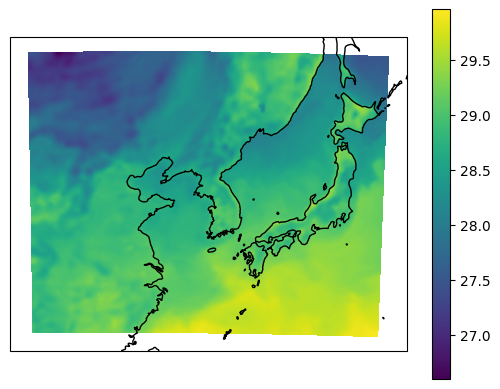

In [42]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy



ax = plt.axes(projection=ccrs.LambertConformal(central_latitude = 37.56667, central_longitude = 127))
cf = plt.pcolormesh(lon, lat, temperature,transform=ccrs.PlateCarree())
plt.colorbar(cf, ax=ax)
# ax.set_extent([122,131.1,43,33])
ax.coastlines('50m')
plt.show()


In [60]:
grb = [grb for grb in grbs]
print(len(grb))

# print(grbs)
# for grb in grbs:
#     # print(len(grb.keys()))
# for a in range(0,len(grb)):
# print(grbs.readline())

29


In [57]:
print(grb[0].keys())

['globalDomain', 'GRIBEditionNumber', 'tablesVersionLatestOfficial', 'tablesVersionLatest', 'grib2divider', 'is_efas', 'angleSubdivisions', 'missingValue', 'ieeeFloats', 'isHindcast', 'section0Length', 'identifier', 'discipline', 'editionNumber', 'totalLength', 'sectionNumber', 'section1Length', 'numberOfSection', 'centre', 'centreDescription', 'subCentre', 'tablesVersion', 'masterDir', 'localTablesVersion', 'significanceOfReferenceTime', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dataDate', 'julianDay', 'dataTime', 'productionStatusOfProcessedData', 'typeOfProcessedData', 'md5Section1', 'selectStepTemplateInterval', 'selectStepTemplateInstant', 'stepType', 'is_chemical', 'is_chemical_distfn', 'is_chemical_srcsink', 'is_aerosol', 'is_aerosol_optical', 'setCalendarId', 'deleteCalendarId', 'is_uerra', 'sectionNumber', 'grib2LocalSectionPresent', 'deleteLocalDefinition', 'sectionNumber', 'gridDescriptionSectionPresent', 'section3Length', 'numberOfSection', 'sourceOfGridDefinitio

In [63]:
for key in grb[0].keys(): 
    try:
        print("key :",key, ", value:", grb[5][key])
    except Exception as e:
        print(e)
        print("error key : ", key)

key : globalDomain , value: g
key : GRIBEditionNumber , value: 2
key : tablesVersionLatestOfficial , value: 27
key : tablesVersionLatest , value: 27
key : grib2divider , value: 1000000
key : is_efas , value: 0
key : angleSubdivisions , value: 1000000
key : missingValue , value: 9999
key : ieeeFloats , value: 1
key : isHindcast , value: 0
key : section0Length , value: 16
key : identifier , value: GRIB
key : discipline , value: 10
key : editionNumber , value: 2
key : totalLength , value: 2640521
key : sectionNumber , value: [1 3 3 4 5 6 7]
key : section1Length , value: 21
key : numberOfSection , value: [1 3 4 5 6 7]
key : centre , value: rksl
key : centreDescription , value: Seoul
key : subCentre , value: 11
key : tablesVersion , value: 4
key : masterDir , value: grib2/tables/[tablesVersion]
key : localTablesVersion , value: 0
key : significanceOfReferenceTime , value: 1
key : year , value: 2022
key : month , value: 5
key : day , value: 11
key : hour , value: 0
key : minute , value: 0
ke

In [21]:
for key in grb1.keys():
    try:
        print(f" key : {key},  value : {grb1[key]}, latlon :",grb1.latlons()[0][0],grb1.latlons()[0].shape)
        print(f" key : {key},  value : {grb1[key]}, latlon :",grb1.latlons()[1][0],grb1.latlons()[1].shape)
        break
    except Exception as e:
        print(e)

 key : globalDomain,  value : g, latlon : [25.27079    25.27581533 25.28083155 ... 25.27874696 25.27372695
 25.26869783] (839, 1049)
 key : globalDomain,  value : g, latlon : [110.632324   110.66095005 110.68958007 ... 141.32232452 141.35095289
 141.37957729] (839, 1049)


In [44]:
key_list = ['year', 'month', 'day', 'hour', 'minute', 'second','dataDate', 'dataTime','forecastTime']

# key = 'year'
for key in key_list: 
    print(f" key : {key},  value : {grb3[key]}")

 key : year,  value : 2022
 key : month,  value : 5
 key : day,  value : 11
 key : hour,  value : 0
 key : minute,  value : 0
 key : second,  value : 0


In [17]:
grbs.seek(1)
grbs.readline()

2:2 metre relative humidity:% (instant):lambert:heightAboveGround:level 2 m:fcst time 0 hrs:from 202205110000

In [9]:
# get a specific grib message from the iterator.
#iterator will be positioned at this message.
grb = grbs.message(3)
grb # 3rd message

3:10 metre U wind component:m s**-1 (instant):lambert:heightAboveGround:level 10 m:fcst time 0 hrs:from 202205110000

In [10]:
keys = grb.keys()

print(len(keys))
print(keys)


226
['globalDomain', 'GRIBEditionNumber', 'tablesVersionLatestOfficial', 'tablesVersionLatest', 'grib2divider', 'is_efas', 'angleSubdivisions', 'missingValue', 'ieeeFloats', 'isHindcast', 'section0Length', 'identifier', 'discipline', 'editionNumber', 'totalLength', 'sectionNumber', 'section1Length', 'numberOfSection', 'centre', 'centreDescription', 'subCentre', 'tablesVersion', 'masterDir', 'localTablesVersion', 'significanceOfReferenceTime', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dataDate', 'julianDay', 'dataTime', 'productionStatusOfProcessedData', 'typeOfProcessedData', 'md5Section1', 'selectStepTemplateInterval', 'selectStepTemplateInstant', 'stepType', 'is_chemical', 'is_chemical_distfn', 'is_chemical_srcsink', 'is_aerosol', 'is_aerosol_optical', 'setCalendarId', 'deleteCalendarId', 'is_uerra', 'sectionNumber', 'grib2LocalSectionPresent', 'deleteLocalDefinition', 'sectionNumber', 'gridDescriptionSectionPresent', 'section3Length', 'numberOfSection', 'sourceOfGridDefin

In [20]:
for key in keys:
    try:
        print(f" key : {key},  value : {grb[key]}, latlon :",grb.latlons()[0].shape)
        break
    except Exception as e:
        print(e)

 key : globalDomain,  value : g, latlon : (839, 1049)


In [6]:
# type(grb['latLonValues'])

import numpy as np
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)
grb.latlons()

NameError: name 'grb' is not defined